In [1]:
import pandas as pd 
import numpy as np 
import os
import numpy as np
import json


with open('/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/proteomics_combinations.json', 'r') as file:
	protein_sets = json.load(file)

protein_categories = protein_sets['plat_response_pathways']
pathways_names = list(protein_categories.keys())
pathways_prots = list(protein_categories.values())

print(pathways_names)

['Apoptotic signaling', 'DDR', 'p53 signaling', 'Platinum efflux', 'PKA signaling', 'Oncogene signaling', 'Metabolism/Lipid', 'Metabolism/OXPHOS', 'Transcription/Epigenetics', 'ECM/stroma', 'ECM signaling', 'EMT', 'WNT signaling', 'NF-kB signaling', 'Notch signaling', 'Immune response', 'Detox', 'Apoptosis', 'Redox', 'AMPK signaling', 'mTOR signaling', 'CSC', 'Metabolism/Glycolysis', 'Cell cycle', 'DDR/direct repair', 'Autophagy', 'Oncogene signaling/MAPK', 'Calcium signaling', 'DDR/BER', 'Translation', 'Redox/Glutathione', 'Hypoxia signaling', 'DDR/nucleotide synthesis', 'Metabolism/amino acid', 'Oncogene signaling/PKG', 'Platinum uptake', 'pH/Pt-toxicity', 'Oncogene signaling/AKT', 'ubiquitin', 'DDR/HR', 'MYC signaling', 'DDR/NER', 'ER stress response', 'TGF-β signaling', 'Chaperone', 'Hippo signaling', 'Transcription', 'DDR/DNA replication', 'vesicle trafficking', 'Hormone receptor signaling', 'Oncogene signaling/EGFR', 'Metabolism/One carbon', 'RNA processing', 'Apoptotic signaling

In [2]:
# Define the path to the main subfolder
main_subfolder = "/mnt/ncshare/ozkilim/BRCA/heatmaps/plat_responce_heatmaps/heatmap_raw_results/HGSOC_MCAT_Mayo_plat_resp_clusters/Unspecified"

# Create an empty DataFrame to store the results
result_df = pd.DataFrame()

# Loop over subfolders in the main subfolder
# Loop over subfolders in the main subfolder
for subfolder in os.listdir(main_subfolder):
    subfolder_path = os.path.join(main_subfolder, subfolder)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Find all .npy files in the subfolder
        npy_files = [f for f in os.listdir(subfolder_path) if f.endswith('.npy')]
        
        # Load each .npy file as a NumPy array
        for npy_file in npy_files:
            npy_file_path = os.path.join(subfolder_path, npy_file)
            np_array = np.load(npy_file_path)
            
            # Calculate the order of the original indices after sorting
            order = np.argsort(np_array)
            # Create a DataFrame for this column
            column_df = pd.DataFrame({subfolder: order[0]})
            # Add the column DataFrame to the result DataFrame
            result_df = pd.concat([result_df, column_df], axis=1)

# Print the resulting DataFrame
result_df.head()

,1009487_171109_ImageActual,1009504_171087_ImageActual,1009463_416632_ImageActual,1009507_171135_ImageActual,1009555_171122_ImageActual,1009833_271287_ImageActual,1009668_269177_ImageActual,1009431_416625_ImageActual,1009540_171133_ImageActual,1009545_171064_ImageActual,...,1009645_269154_ImageActual,1009837_271281_ImageActual,1009420_171030_ImageActual,1009638_269147_ImageActual,1009607_269116_ImageActual,1009486_171083_ImageActual,1009425_171016_ImageActual,1009521_416647_ImageActual,1009652_269161_ImageActual,1009844_271299_ImageActual
0,5,38,29,52,38,77,29,63,37,77,...,1,0,17,10,26,5,19,3,24,63
1,6,26,10,38,41,2,30,49,10,12,...,18,38,12,26,14,6,29,15,13,30
2,77,65,59,37,10,54,77,12,65,6,...,77,5,14,59,29,77,23,24,77,0
3,15,30,12,70,17,53,70,66,52,56,...,70,3,26,19,13,15,73,30,10,32
4,31,5,65,6,51,73,59,30,59,70,...,23,26,49,29,70,31,28,62,29,12


In [3]:
to_save = result_df.copy()
to_save.index=pathways_names
to_save.head()
to_save.to_csv("pathway_cohort_rankings.csv")

In [4]:
# now select columns given labels... 
df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/process_lists/HGSOC_MAYO_hold_out_Primary_process_list.csv")
df = df[["label","slide_id"]]

filtered_new_df = df[df["label"] == 0]
# Get the list of subfolders from the filtered DataFrame
selected_subfolders = filtered_new_df["slide_id"].tolist()
# Select columns from result_df based on the selected subfolders
selected_columns = result_df[selected_subfolders]
mean_ranks = selected_columns.mean(axis=1)
# Create a DataFrame with the mean ranks and the corresponding items
mean_rank_df = pd.DataFrame({'Item': mean_ranks.index, 'MeanRank': mean_ranks.values})
# Sort the items based on their mean ranks to obtain the ensemble ranking
ensemble_ranking = mean_rank_df.sort_values(by='MeanRank')
# Reset the index of the ensemble ranking DataFrame
ensemble_ranking.reset_index(drop=True, inplace=True)
# Print the ensemble ranking
overall_ranking = ensemble_ranking["Item"].to_list()
ordered_pathways_resistant = [pathways_names[i] for i in overall_ranking]


filtered_new_df = df[df["label"] == 1]
# Get the list of subfolders from the filtered DataFrame
selected_subfolders = filtered_new_df["slide_id"].tolist()
# Select columns from result_df based on the selected subfolders
selected_columns = result_df[selected_subfolders]
mean_ranks = selected_columns.mean(axis=1)
# Create a DataFrame with the mean ranks and the corresponding items
mean_rank_df = pd.DataFrame({'Item': mean_ranks.index, 'MeanRank': mean_ranks.values})
# Sort the items based on their mean ranks to obtain the ensemble ranking
ensemble_ranking = mean_rank_df.sort_values(by='MeanRank')
# Reset the index of the ensemble ranking DataFrame
ensemble_ranking.reset_index(drop=True, inplace=True)
# Print the ensemble ranking
overall_ranking = ensemble_ranking["Item"].to_list()
ordered_pathways_sensitive = [pathways_names[i] for i in overall_ranking] 

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (7632) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


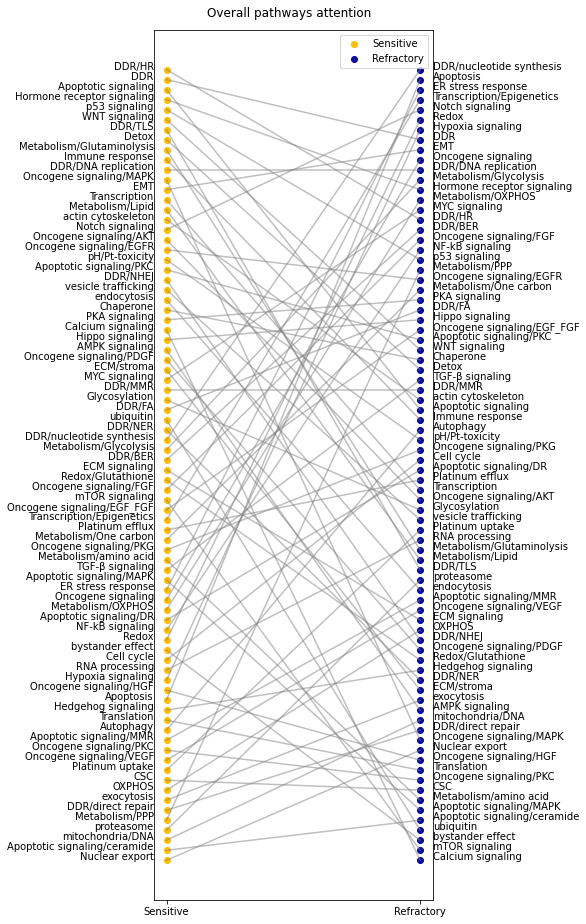

In [5]:
import matplotlib.pyplot as plt

# Example data
list1 = ordered_pathways_sensitive.copy()[::-1]
list2 = ordered_pathways_resistant.copy()[::-1]
# Determine the positions of list1 items in list2
positions_list1 = range(len(list1))
positions_list2 = [list2.index(item) for item in list1]  # Finds the index of list1 items in list2

# Plotting
plt.figure(figsize=(5, 16))

# Plotting points for each list
plt.plot([0]*len(list1), positions_list1, 'o', color='#FFBD00', label='Sensitive')
plt.plot([1]*len(list2), positions_list2, 'o', color='#090C9B', label='Refractory')

# Drawing lines between the same items
for pos1, pos2 in zip(positions_list1, positions_list2):
    plt.plot([0, 1], [pos1, pos2], 'grey', alpha=0.5)

# Labeling
for position, label in zip(positions_list1, list1):
    plt.text(-0.05, position, label, ha='right')
for position, label in zip(positions_list2, list1):  # Use list1 to ensure labels match the lines
    plt.text(1.05, position, label, ha='left')

plt.yticks([])  # Hide y-axis ticks
plt.xticks([0, 1], ['Sensitive', 'Refractory'])
plt.legend()
plt.suptitle("Overall pathways attention",y=0.90)
# plt.tight_layout()
plt.savefig("../../figures/pathways_rankings.png", facecolor='white', dpi=300,bbox_inches='tight')
plt.show()

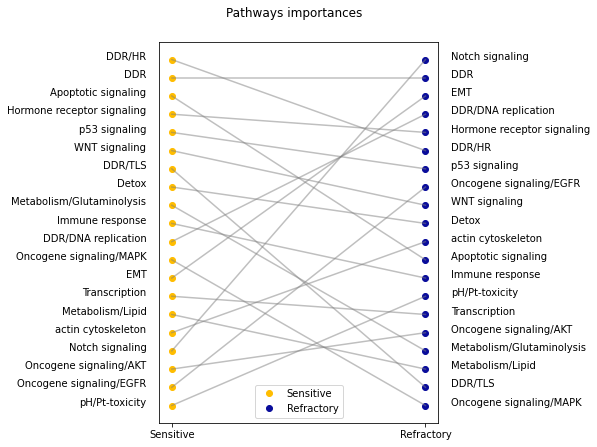

In [28]:
# Assuming ordered_pathways_sensitive and ordered_pathways_resistant are defined and imported
# list1 and list2 are initially reversed to prioritize the top items
list1_initial = ordered_pathways_sensitive.copy()
list2_initial = ordered_pathways_resistant.copy()

# Find common items
common_items = set(list1_initial) & set(list2_initial)

# Select top 6 common items, prioritizing the order in list1 and list2
top_common_items = []
for item in list1_initial + list2_initial:  # Iterate through both lists to maintain priority
    if item in common_items and item not in top_common_items:
        top_common_items.append(item)
        if len(top_common_items) == 20:  # Stop when you have 6 items
            break

# Filter original lists to include only the selected top 6 common items
list1 = [item for item in list1_initial if item in top_common_items][::-1]
list2 = [item for item in list2_initial if item in top_common_items][::-1]


# Plotting adjustments are similar but applied to the filtered lists
import matplotlib.pyplot as plt

# Determine the positions of list1 items in list2
positions_list1 = range(len(list1))
positions_list2 = [list2.index(item) for item in list1]  # Finds the index of list1 items in list2

plt.figure(figsize=(5, 7))
plt.plot([0]*len(list1), positions_list1, 'o', color='#FFBD00', label='Sensitive')
plt.plot([1]*len(list2), positions_list2, 'o', color='#090C9B', label='Refractory')

for pos1, pos2 in zip(positions_list1, positions_list2):
    plt.plot([0, 1], [pos1, pos2], 'grey', alpha=0.5)

# Labeling adjustments for the filtered lists
for position, label in zip(positions_list1, list1):
    plt.text(-0.1, position, label, ha='right')
for position, label in zip(positions_list2, list1):
    plt.text(1.1, position, label, ha='left')


plt.yticks([])  # Hide y-axis ticks
plt.xticks([0, 1], ['Sensitive', 'Refractory'])
plt.legend()
plt.suptitle("Pathways importances",y=0.95)
# plt.tight_layout()
plt.savefig("../../figures/abstract_pathways_rankings.png", facecolor='white', dpi=300,bbox_inches='tight')

plt.legend()
plt.show()

In [ ]:
plt_genes = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/plat_res_prots.xlsx",header=2)
plt_genes.head()

,Index,NCBI link,Uniprot link,HUGO Gene symbol,Uniprot Gene symbol,Alternate IDs,Protein name,Function,Putative mechanism associated with Pt-resistancea,PMID,Notesb,Up / down in Pt-resistant cellsc,Up / down to promote Pt-resistanced,Up / down after Pt-treatmente,Druggablef,Source of the supporting data,Scores
0,1,26574,Q9NY61,AATF,AATF,"CHE1, DED, HSPC277",Apoptosis-antagonizing transcription factor / ...,May function as a general inhibitor of the his...,"Apoptotic signaling, DDR, p53 signaling","22909821, 18004398",1) AATF amplification is associated with incre...,UP,UP,UP,NaN,cell line,1
1,2,10351,O94911,ABCA8,ABCA8,NaN,ATP-binding cassette sub-family A member 8,ATP-dependent lipophilic drug transporter,Platinum efflux,25891226,1) 489 TCGA ovarian cancer patient samples wit...,UP,UP,UP,NaN,cell line,1
2,3,5243,P08183,ABCB1,ABCB1,"MDR1, PGY1, pGP",ATP-binding cassette sub-family B member 1,Translocates drugs and phospholipids across th...,Platinum efflux,"15262121, 15863151, 16026610, 10810398, 20189873",1) The mRNA for MDR-1 was uniquely overexpress...,UP,UP,UNCHANGED in S; UP in R,Yes,cell line; patient tissue,4
3,4,340273,Q2M3G0,ABCB5,ABCB5,NaN,ATP-binding cassette sub-family B member 5,Drug efflux transporter present in a number of...,Platinum efflux,31107974,1) Compared to differentiated/adherent cells (...,UP,UP,UNKNOWN,NaN,cell line; clinical outcome; patient tissue,4
4,5,4363,P33527,ABCC1,ABCC1,"MRP, MRP1",Multidrug resistance-associated protein 1,Mediates export of organic anions and drugs fr...,Platinum efflux,"20005867, 25308861, 20082278",1) Ovarian cancer IGROV-1/OHP exhibited high l...,UP,UP,UNKNOWN,NaN,cell line; clinical outcome; patient tissue,4


In [ ]:
# Up / down after Pt-treatmente

# Druggablef	

plt_genes["Scores"].value_counts()

4    364
1    341
5    110
2     99
3     23
Name: Scores, dtype: int64

In [ ]:
find way of presenting this result... mabye in main abstract figure?.... 

SyntaxError: invalid syntax (<ipython-input-15-afee3d1adeca>, line 1)